# Student Dropout Prediction - Task 2

## 1. Introduction
In this task, we will perform data cleaning, preprocessing, and modeling on the provided student dropout dataset. Three different models will be trained and evaluated: Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM).

## 2. Importing Libraries
First, let's import the necessary libraries.


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

## 3. Loading the Dataset


In [18]:
# Load the data
data = pd.read_csv("student_dropout.csv")

# Display the first few rows of the dataset
data.head()

# Basic information about the dataset
data.info()

# Statistical summary of the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## 4. Data Cleaning
* Check for missing values and handle them.
* Check for duplicates and drop them if any.
* Convert any categorical variables into numerical form if needed.


In [8]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

## 5. Data Preprocessing
* Encode categorical variables if necessary.
* Scale numerical features if needed.
* Split the data into training and testing sets.


In [14]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
data['Course'] = le.fit_transform(data['Course'])

# Split the data into features and target
X = data[['Course', 'Admission grade', 'Age at enrollment']]  
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6. Model Building
* Apply Logistic Regression, KNN, and SVM models on different columns of the dataset.
* Train and test each model.


In [32]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_score = knn_model.score(X_test, y_test)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)

print("Logistic Regression Accuracy:", lr_score)
print("K-Nearest Neighbors Accuracy:", knn_score)
print("Support Vector Machine Accuracy:", svm_score)

Logistic Regression Accuracy: 0.536723163841808
K-Nearest Neighbors Accuracy: 0.5389830508474577
Support Vector Machine Accuracy: 0.5672316384180791


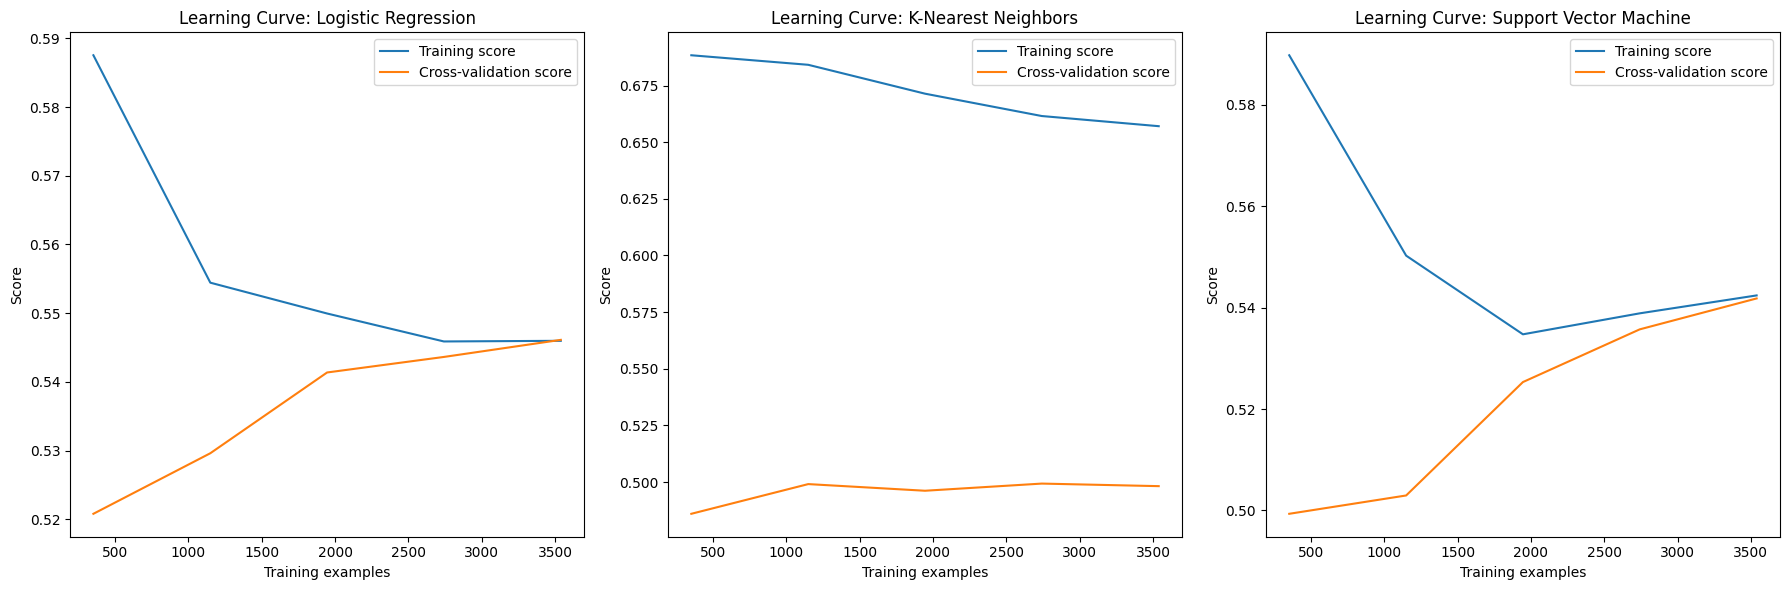

In [33]:
# Plot learning curves for each model
models = [lr_model, knn_model, svm_model]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, model in enumerate(models):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, n_jobs=-1)
    
    axes[i].plot(train_sizes, train_scores.mean(axis=1), label='Training score')
    axes[i].plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
    axes[i].set_xlabel('Training examples')
    axes[i].set_ylabel('Score')
    axes[i].set_title(f'Learning Curve: {model_names[i]}')
    axes[i].legend()

plt.tight_layout()
plt.show()